In [53]:
import pandas as pd
import seaborn as sns
import numpy as np

In [34]:
df = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

In [35]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [36]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


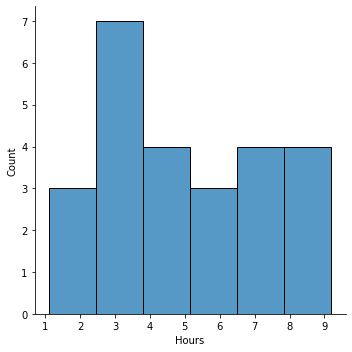

In [37]:
sns.displot(df['Hours'])

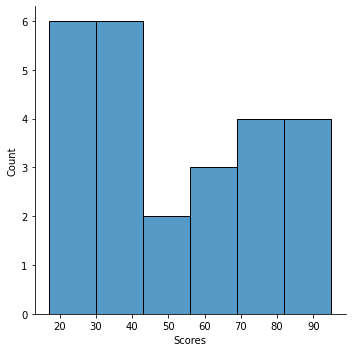

In [38]:
sns.displot(df['Scores'])

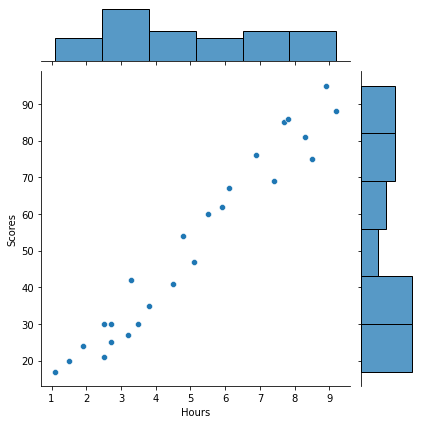

In [39]:
sns.jointplot(data=df[['Hours','Scores']], x="Hours", y="Scores")

In [41]:
msk = np.random.rand(len(df)) < 0.8

train = df[msk]
test = df[~msk]

In [42]:
from sklearn.linear_model import LinearRegression, Ridge

In [43]:
from sklearn.metrics import r2_score

In [75]:
regr = LinearRegression()
train_x = np.asanyarray(train[['Hours']])
train_y = train[['Scores']].values
regr.fit (train_x, train_y)

LinearRegression()

In [76]:
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[9.92785984]]
Intercept:  [1.21567617]


<AxesSubplot:xlabel='Hours', ylabel='Scores'>

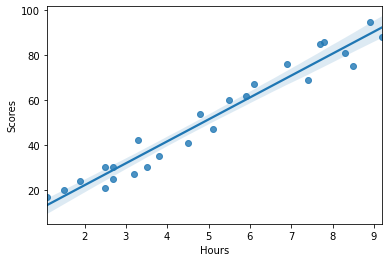

In [77]:
sns.regplot(x="Hours",y="Scores",data=df)

In [84]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Hours']])
test_y = np.asanyarray(test[['Scores']])[:,0]
test_pred = regr.predict(test_x)[:,0]

In [85]:
test_pred

array([26.03532578, 55.8189053 , 12.136322  , 26.03532578, 61.77562121,
       74.681839  , 48.86940341])

In [86]:
df1 = pd.DataFrame({'Actual': test_y, 'Predicted': test_pred})
df1

,Actual,Predicted
0,21,26.035326
1,60,55.818905
2,17,12.136322
3,30,26.035326
4,67,61.775621
5,69,74.681839
6,54,48.869403


# test accuracy

In [88]:
from sklearn.metrics import r2_score

In [89]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(test_y, test_pred)) 

Mean Absolute Error: 4.868798154782357
